# House Market

Let's go a little further into python.

1. Download the four files “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv” / "house_price.csv"

2. Read the files and create the 4 corresponding Dataframes


In [1]:
import pandas as pd

In [61]:
df_superficie = pd.read_csv("src/house_market/superficie.csv", header=None)
df_nombre_de_sdb = pd.read_csv("src/house_market/nombre_de_sdb.csv", header=None)
df_nombre_de_chambres = pd.read_csv("src/house_market/nombre_de_chambres.csv", header=None)
df_house_price = pd.read_csv("src/house_market/house_price.csv")

In [62]:
df_superficie.head()
df_nombre_de_sdb.head()
df_nombre_de_chambres.head()
df_house_price.head()

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0


3. Give a column name to the three datasets that don't have a header in the source file

In [63]:
df_superficie.columns = ["id", "surface"]
df_superficie.head()


,id,surface
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


In [64]:
df_nombre_de_sdb.columns = ["id", "bathrooms"]
df_nombre_de_sdb.head()

,id,bathrooms
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [97]:
df_nombre_de_chambres.columns = ["id", "rooms"]
df_nombre_de_chambres.head()

,id,rooms
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


4. Make an inner join of these four datasets into a single dataframe. 

In [83]:
# dataset = surface.merge(bathrooms).merge(rooms).merge(house_price)
df = df_superficie.merge(df_nombre_de_sdb, left_on="id", right_on="id", how="inner").merge(df_nombre_de_chambres, left_on="id", right_on="id", how="inner").merge(df_house_price, left_on="id", right_on="id", how="inner")
df                      

,id,surface,bathrooms,rooms,Unnamed: 0,house_price
0,0,28844,2,1,32,1421908.0
1,1,27667,1,4,71,1305091.0
2,2,14742,1,1,65,164373.0
3,3,28089,3,4,88,1441714.0
4,4,11713,1,2,49,108290.0
...,...,...,...,...,...,...
95,95,11417,3,3,39,132599.0
96,96,12126,1,2,15,155828.0
97,97,16390,1,2,13,237061.0
98,98,23738,1,2,9,976422.0


5. What is the average surface area of the houses in our dataset?

In [70]:
avg_surface = df["surface"].mean()
avg_surface

20439.77

6. What is the median and average number of rooms?

In [71]:
mdn_rooms = df["rooms"].median()
avg_rooms = df["rooms"].mean()

print(f"The average number of room is {avg_rooms}, and the median number is {mdn_rooms}")

The average number of room is 2.42, and the median number is 2.0


7. What is the average cost of a house?

In [73]:
avg_cost_of_house = df["house_price"].mean()
avg_cost_of_house

767747.87

8. What is the average cost of a house, depending on the number of rooms it has?

In [76]:
avg_cost_rooms_based = df.groupby("rooms")["house_price"].mean()
avg_cost_rooms_based

rooms
1    980774.869565
2    642086.258065
3    645904.592593
4    888045.631579
Name: house_price, dtype: float64

10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create three categories that respectively correspond to :

      - "very large" == "a house larger than 25,000 sqrt_feet"
      
      - "large" == "a house between 20,000 and 25,000 sqrt_feet"
      
      - "medium" == "a house between 15,000 and 20,000 sqrt_feet"
    
      - "small" == "a house between 10,000 and 15,000 sqrt_feet" 
    
      - "very small" == a house less than 10,000 sqrt_feet"
      
Fill in the corresponding rows in the house_size column.

In [84]:
cat=["Very Large", "Large", "Medium", "Small", "Very Small"]

def category(x):
    if x >= 25000:
        return cat[0]
    elif x >= 20000 and x < 25000:
        return cat[1]
    elif x >= 15000 and x < 20000:
        return cat[2]
    elif x >= 10000 and x < 15000:
        return cat[3]
    else:
        return cat[4]

df["house_size"] = df["surface"].apply(lambda x: category(x))
df

,id,surface,bathrooms,rooms,Unnamed: 0,house_price,house_size
0,0,28844,2,1,32,1421908.0,Very Large
1,1,27667,1,4,71,1305091.0,Very Large
2,2,14742,1,1,65,164373.0,Small
3,3,28089,3,4,88,1441714.0,Very Large
4,4,11713,1,2,49,108290.0,Small
...,...,...,...,...,...,...,...
95,95,11417,3,3,39,132599.0,Small
96,96,12126,1,2,15,155828.0,Small
97,97,16390,1,2,13,237061.0,Medium
98,98,23738,1,2,9,976422.0,Large


11. What is the average cost of a house depending on its size category?


In [86]:
avg_cost_size_based = df.groupby("house_size")["house_price"].mean()
avg_cost_size_based

house_size
Large         7.325385e+05
Medium        3.256948e+05
Small         1.561387e+05
Very Large    1.552456e+06
Name: house_price, dtype: float64

 12. Apply the code below to view your result. What can you conclude?

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

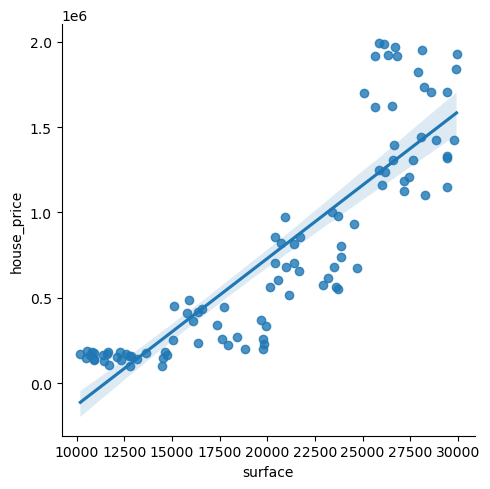

In [96]:
sns.lmplot(x = "surface", y="house_price", data = df)
plt.show()